In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('data/marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [45]:
df = df.drop('Unnamed: 0', axis=1)

In [46]:
df['test group'].value_counts()

test group
ad     564577
psa     23524
Name: count, dtype: int64

In [47]:
df.describe()

,user id,total ads,most ads hour
count,5.881010e+05,588101.000000,588101.000000
mean,1.310692e+06,24.820876,14.469061
std,2.022260e+05,43.715181,4.834634
min,9.000000e+05,1.000000,0.000000
25%,1.143190e+06,4.000000,11.000000
50%,1.313725e+06,13.000000,14.000000
75%,1.484088e+06,27.000000,18.000000
max,1.654483e+06,2065.000000,23.000000


In [48]:
df['test group'] = df['test group'].astype('category')

In [49]:
df['most ads day'] = df['most ads day'].astype('category')

In [50]:
df['converted'] = df['converted'].astype(int)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   user id        588101 non-null  int64   
 1   test group     588101 non-null  category
 2   converted      588101 non-null  int32   
 3   total ads      588101 non-null  int64   
 4   most ads day   588101 non-null  category
 5   most ads hour  588101 non-null  int64   
dtypes: category(2), int32(1), int64(3)
memory usage: 16.8 MB


In [52]:
intersection_users = list(set(df[df['test group'] == 'ad']['user id'].values) & \
set(df[df['test group'] == 'psa']['user id'].values))
print('Кол-во пользователей, попавших в обе группы:', len(intersection_users))

Кол-во пользователей, попавших в обе группы: 0


In [53]:
df['most ads day'].value_counts()

most ads day
Friday       92608
Monday       87073
Sunday       85391
Thursday     82982
Saturday     81660
Wednesday    80908
Tuesday      77479
Name: count, dtype: int64

In [54]:
# фильтруем данные группы ad
ad_data = df[df['test group'] == 'ad']
# фильтруем данные группы psa
psa_data = df[df['test group'] == 'psa']

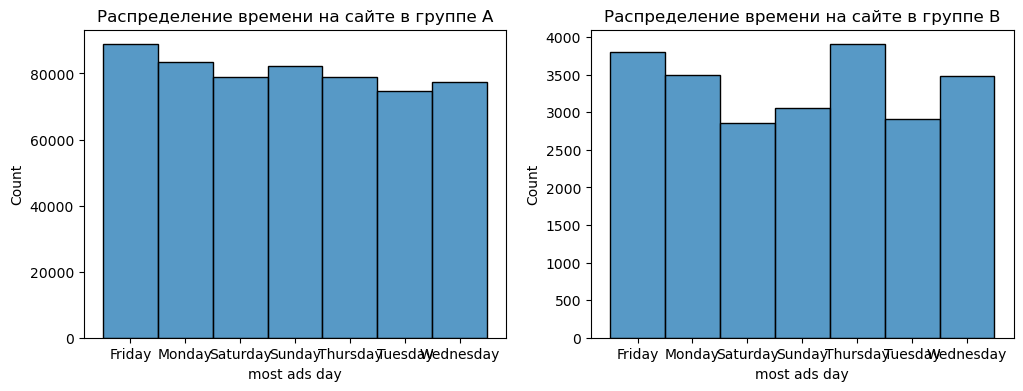

In [55]:
# создаём два графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# строим гистограмму для времени на сайте в каждой группе
sns.histplot(x='most ads day', data=ad_data, ax=axes[0])
sns.histplot(x='most ads day', data=psa_data, ax=axes[1])
# задаём названия графикам
axes[0].set_title('Распределение времени на сайте в группе А');
axes[1].set_title('Распределение времени на сайте в группе B');

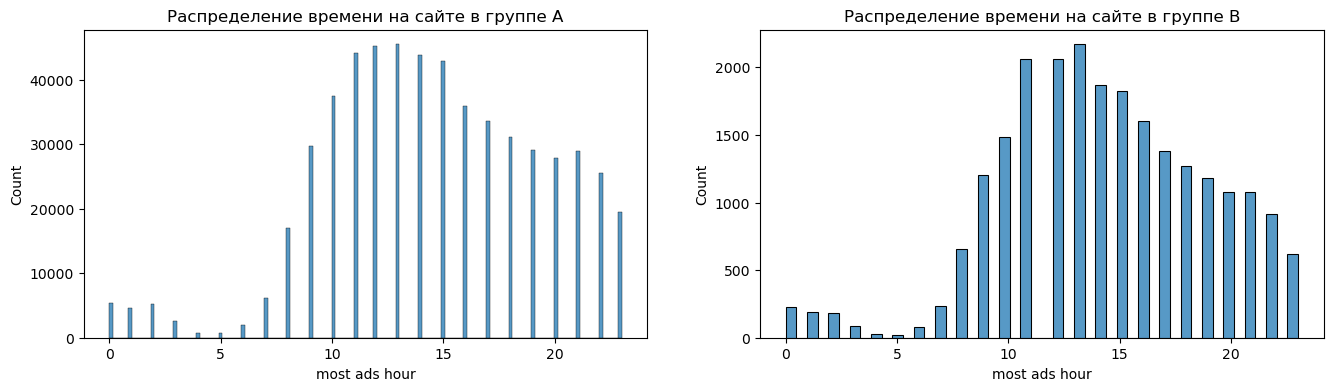

In [56]:
# создаём два графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
# строим гистограмму для времени на сайте в каждой группе
sns.histplot(x='most ads hour', data=ad_data, ax=axes[0])
sns.histplot(x='most ads hour', data=psa_data, ax=axes[1])
# задаём названия графикам
axes[0].set_title('Распределение времени на сайте в группе А');
axes[1].set_title('Распределение времени на сайте в группе B');

In [57]:
df = df.drop(columns=['most ads day', 'most ads hour'])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   user id     588101 non-null  int64   
 1   test group  588101 non-null  category
 2   converted   588101 non-null  int32   
 3   total ads   588101 non-null  int64   
dtypes: category(1), int32(1), int64(2)
memory usage: 11.8 MB


In [59]:
df['user id'].unique().shape

(588101,)

In [61]:
grouped_data = df.groupby('test group').agg({
    'user id': 'count',
    'converted': 'sum',
    'total ads': 'sum'
}).rename({'user id': 'count_of_visits', 
           'converted': 'count_of_purchases'}, axis=1)
grouped_data

C:\Users\dimac\AppData\Local\Temp\ipykernel_6444\3380360057.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('test group').agg({


,count_of_visits,count_of_purchases,total ads
test group,,,
ad,564577,14423,14014701
psa,23524,420,582481


In [62]:
grouped_data['conversion'] = grouped_data['count_of_purchases'] / grouped_data['count_of_visits'] * 100
grouped_data['mean ads'] = grouped_data['total ads'] / grouped_data['count_of_visits']
grouped_data

,count_of_visits,count_of_purchases,total ads,conversion,mean ads
test group,,,,,
ad,564577,14423,14014701,2.554656,24.823365
psa,23524,420,582481,1.785411,24.761138
